# 🏠 House Price Detective: Your First ML Project

**Welcome!** You're about to build something real - a system that predicts house prices.

---

## 📖 The Story

Imagine you're a real estate agent's assistant. Your boss asks:

> *"We have a new house: 1,800 sqft, 3 bedrooms, 11 years old. What should we price it at?"*

Instead of guessing, you'll build a **smart system** that learns from past house sales to predict prices.

**Today you'll learn:**
- How to find patterns in data
- How to make predictions
- How to know if your predictions are good

No scary math. No complicated jargon. Just you, data, and problem-solving! 🎯

---

## ⏰ Time Expectation

This will take about **2 hours** if you're new to this. That's okay!

**How to use this notebook:**
1. Read each section carefully
2. Fill in the code where you see `# YOUR CODE HERE`
3. Run your code to test it
4. Don't skip ahead - each part builds on the previous one

---

## 🎯 What You'll Build

By the end, you'll have:
- ✅ A working house price predictor
- ✅ Understanding of how ML actually works
- ✅ Code **you wrote yourself**
- ✅ Confidence to tackle more ML problems

---

**Ready? Let's start! 🚀**

*💡 Tip: Click the ▶️ button on the left of each code cell to run it*

---

# 🔧 Step 0: Getting Ready

Before we start, we need some tools. Think of this like opening your toolbox before fixing something.

**What we're loading:**
- `numpy` - helps us do math with lots of numbers at once
- `matplotlib` - helps us draw charts and graphs

**Just run the cell below** (click the ▶️ button). You'll see a green checkmark when it's done!

In [1]:
# Import our tools
import numpy as np
import matplotlib.pyplot as plt

# This makes sure we get the same results every time
np.random.seed(42)

print("✅ Tools loaded successfully!")
print("\nYou're ready to start!")

✅ Tools loaded successfully!

You're ready to start!


---

# 📊 Step 1: Meet Your Data

## The Scenario

Your boss gives you records of **10 houses** that were recently sold. For each house, you know:
- **Size** (how many square feet)
- **Bedrooms** (how many bedrooms)
- **Age** (how old the house is)
- **Price** (what it sold for, in thousands of dollars)

Your job: Use these past sales to predict prices for **new houses**.

Let's look at the data!

In [2]:
# Our past house sales (10 houses)
sizes = np.array([1400, 1600, 1700, 1875, 1100, 1550, 2350, 2450, 1425, 1700])
bedrooms = np.array([3, 3, 3, 4, 2, 3, 4, 5, 3, 3])
ages = np.array([15, 10, 12, 8, 20, 14, 5, 3, 18, 9])
prices = np.array([245, 312, 279, 308, 199, 219, 405, 324, 319, 255])

print("📋 Our Past House Sales:\n")
print("House | Size (sqft) | Bedrooms | Age (years) | Price ($1000s)")
print("-" * 65)
for i in range(len(sizes)):
    print(f"  {i+1}   |    {sizes[i]:4d}    |    {bedrooms[i]}     |     {ages[i]:2d}      |    ${prices[i]}k")

print(f"\n✅ We have data from {len(sizes)} house sales!")

📋 Our Past House Sales:

House | Size (sqft) | Bedrooms | Age (years) | Price ($1000s)
-----------------------------------------------------------------
  1   |    1400    |    3     |     15      |    $245k
  2   |    1600    |    3     |     10      |    $312k
  3   |    1700    |    3     |     12      |    $279k
  4   |    1875    |    4     |      8      |    $308k
  5   |    1100    |    2     |     20      |    $199k
  6   |    1550    |    3     |     14      |    $219k
  7   |    2350    |    4     |      5      |    $405k
  8   |    2450    |    5     |      3      |    $324k
  9   |    1425    |    3     |     18      |    $319k
  10   |    1700    |    3     |      9      |    $255k

✅ We have data from 10 house sales!


## 🤔 Quick Observation

Look at the table above. Do you notice any patterns?

- **Bigger houses** tend to cost more (House 7 & 8 are largest and most expensive)
- **Older houses** might cost less (House 5 is oldest and cheapest)
- **More bedrooms** might mean higher price

**Your brain just did machine learning!** You looked at data and found patterns.

Now, let's teach the computer to do the same thing! 🧠➡️💻

## 📈 Exercise 1.1: Visualize the Data

Numbers in a table are boring. Let's make a picture!

We'll create a **scatter plot** - each dot is one house.

**Your task:** Complete the code to create the plot.

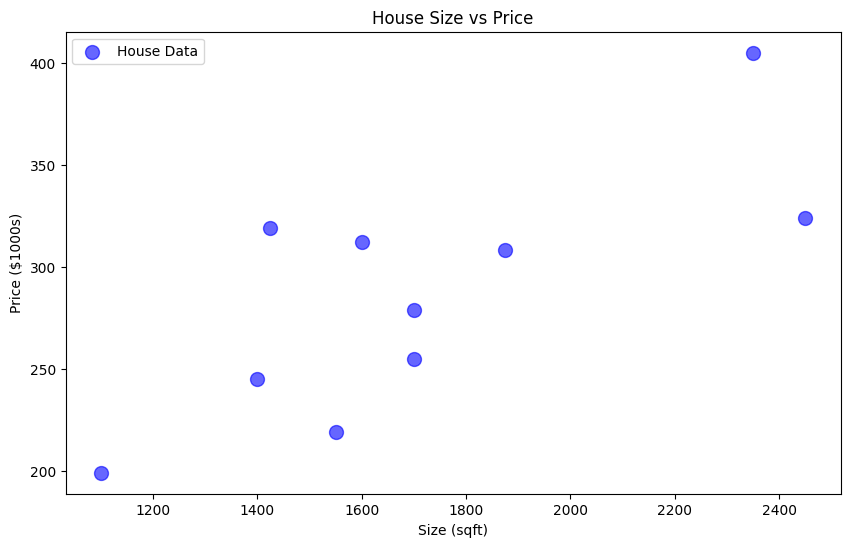


👀 Look at the picture:
- Each blue dot is one house
- Dots go UP and to the RIGHT
- This means: bigger house = higher price!

💡 Can you imagine drawing a line through these dots?


In [3]:
# Create a scatter plot: Size vs Price
plt.figure(figsize=(10, 6))

# YOUR CODE HERE: Create a scatter plot (size vs price)
# Hint: plt.scatter(x_values, y_values, color='blue', s=100, alpha=0.6)
plt.scatter(sizes, prices, color='blue', s=100, alpha=0.6, label="House Data")

plt.xlabel("Size (sqft)")
plt.ylabel("Price ($1000s)")
plt.title("House Size vs Price")

plt.legend()
plt.show()


print("\n👀 Look at the picture:")
print("- Each blue dot is one house")
print("- Dots go UP and to the RIGHT")
print("- This means: bigger house = higher price!")
print("\n💡 Can you imagine drawing a line through these dots?")

---

# 🎯 Step 2: Drawing a Line (The Simple Way)

## Why a Line?

Look at those dots. They're not perfectly straight, but they follow a **general upward trend**.

If we draw a line through them, we can:
1. See the pattern clearly
2. Predict prices for NEW houses

## The Line Equation

Remember from school: `y = mx + b`

For houses:
```
Price = m × Size + b
```

Where:
- **m** (slope) = how much price increases per square foot
- **b** (intercept) = starting price (if house was 0 sqft - not realistic, but mathematically needed)

**Our mission:** Find the BEST values for m and b!

## 🧮 The Secret Formula

Mathematicians figured out the BEST way to find m and b:

**Step 1: Calculate averages**
```python
average_size = mean of all sizes
average_price = mean of all prices
```

**Step 2: Find how each value differs from average**
```python
size_diff = size - average_size (for each house)
price_diff = price - average_price (for each house)
```

**Step 3: Calculate slope (m)**
```python
m = sum(size_diff × price_diff) / sum(size_diff²)
```

**Step 4: Calculate intercept (b)**
```python
b = average_price - (m × average_size)
```

Let's code it step by step!

## 🎓 Exercise 2.1: Calculate Averages

First, find the average (mean) size and price.

**Hint:** Use `np.mean(array_name)`

In [4]:
# Calculate the average size
# YOUR CODE HERE
average_size = np.mean(sizes)  

# Calculate the average price
# YOUR CODE HERE
average_price = np.mean(prices) 

# Check your answer
print(f"Average house size: {average_size:.0f} square feet")
print(f"Average price: ${average_price:.0f}k")
print("\n✅ If you see numbers above (not 'None'), you did it right!")

Average house size: 1715 square feet
Average price: $286k

✅ If you see numbers above (not 'None'), you did it right!


## 🎓 Exercise 2.2: Calculate Differences

Now find how much each house differs from the average.

**Example:** If a house is 2000 sqft and average is 1750, the difference is +250

In [5]:
# Calculate size differences (size - average_size)
# YOUR CODE HERE
size_differences = sizes - average_size

# Calculate price differences (prices - average_price)
# YOUR CODE HERE  
price_differences = prices - average_price

# Check your work
print("First 3 houses:")
print(f"House 1: Size diff = {size_differences[0]:.0f}, Price diff = {price_differences[0]:.0f}")
print(f"House 2: Size diff = {size_differences[1]:.0f}, Price diff = {price_differences[1]:.0f}")
print(f"House 3: Size diff = {size_differences[2]:.0f}, Price diff = {price_differences[2]:.0f}")
print("\n💡 Positive = bigger/pricier than average. Negative = smaller/cheaper")

First 3 houses:
House 1: Size diff = -315, Price diff = -42
House 2: Size diff = -115, Price diff = 26
House 3: Size diff = -15, Price diff = -8

💡 Positive = bigger/pricier than average. Negative = smaller/cheaper


## 🎓 Exercise 2.3: Calculate Slope (m)

This is the most important part! The slope tells us:

**"For every extra square foot, how much does the price go up?"**

Formula:
```python
m = sum(size_differences * price_differences) / sum(size_differences ** 2)
```

**Hints:**
- `*` multiplies arrays element by element
- `**` means "to the power of" (so `** 2` means squared)
- `np.sum()` adds up all the values

In [6]:
# Calculate the numerator (top of the fraction)
# Hint: multiply size_differences and price_differences, then sum
# YOUR CODE HERE
numerator = np.sum(size_differences * price_differences)

# Calculate the denominator (bottom of the fraction)
# Hint: square the size_differences, then sum
# YOUR CODE HERE
denominator = np.sum(size_differences ** 2)

# Calculate slope
# YOUR CODE HERE
m = numerator / denominator

# Check your answer
print(f"Slope (m) = {m:.4f}")
print(f"\nThis means: For every extra square foot, price goes up ${m:.4f}k")
print(f"In dollars: ${m * 1000:.2f} per square foot")
print("\n💡 Does this seem reasonable? (Houses usually cost $100-200 per sqft)")

Slope (m) = 0.1098

This means: For every extra square foot, price goes up $0.1098k
In dollars: $109.77 per square foot

💡 Does this seem reasonable? (Houses usually cost $100-200 per sqft)


## 🎓 Exercise 2.4: Calculate Intercept (b)

The intercept is easier! It's the starting point of our line.

Formula:
```python
b = average_price - (m * average_size)
```

In [7]:
# Calculate intercept
# YOUR CODE HERE
b = average_price - (m * average_size)

# Check your answer
print(f"Intercept (b) = {b:.2f}")
print()
print("="*60)
print(f"\n🎉 YOUR LINE EQUATION:")
print(f"\nPrice = {m:.4f} × Size + {b:.2f}")
print(f"\nIn simpler terms:")
print(f"Price = ${m*1000:.2f} per square foot + ${b*1000:.0f} base price\n")
print("="*60)

Intercept (b) = 98.25


🎉 YOUR LINE EQUATION:

Price = 0.1098 × Size + 98.25

In simpler terms:
Price = $109.77 per square foot + $98248 base price



## 📊 Exercise 2.5: Draw Your Line

Let's see how well your line fits the data!

We'll draw:
- Blue dots = actual houses
- Red line = your prediction line

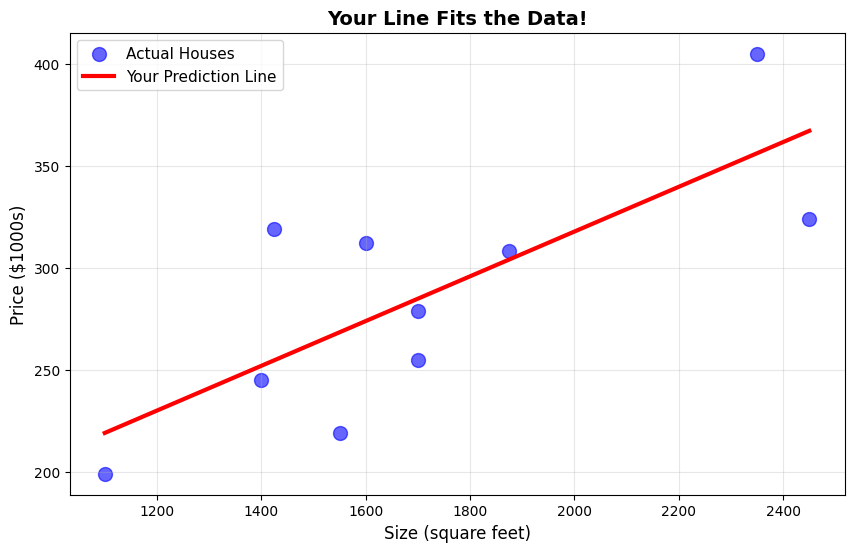


👀 Look at your line:
- Does it go through the middle of the dots?
- Some dots are above it, some below - that's normal!

✨ You just built your first ML model!


In [8]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot actual houses (blue dots)
plt.scatter(sizes, prices, color='blue', s=100, alpha=0.6, label='Actual Houses')

# Create points for the line
line_x = np.linspace(sizes.min(), sizes.max(), 100)

# Calculate y values for the line using YOUR equation
# YOUR CODE HERE: line_y = m * line_x + b
line_y =  m * line_x + b  

# Plot your line
plt.plot(line_x, line_y, color='red', linewidth=3, label='Your Prediction Line')

plt.xlabel('Size (square feet)', fontsize=12)
plt.ylabel('Price ($1000s)', fontsize=12)
plt.title('Your Line Fits the Data!', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("\n👀 Look at your line:")
print("- Does it go through the middle of the dots?")
print("- Some dots are above it, some below - that's normal!")
print("\n✨ You just built your first ML model!")

---

# 🔮 Step 3: Make Your First Prediction!

## The Moment of Truth

Remember the question your boss asked?

> *"We have a new house: 1,800 sqft. What should we price it at?"*

Now you can answer! Just plug the size into your equation:

```
Price = m × 1800 + b
```

## 🎓 Exercise 3.1: Make a Prediction

Use your equation to predict the price of an 1,800 sqft house.

In [9]:
# New house size
new_house_size = 1800

# Calculate the predicted price using your equation
# YOUR CODE HERE: predicted_price = m * new_house_size + b
predicted_price = m * new_house_size + b

print("🏠 New House Information:")
print(f"   Size: {new_house_size} square feet")
print()
print("🔮 Your Prediction:")
print(f"   Price: ${predicted_price:.2f}k")
print(f"   That's ${predicted_price * 1000:.0f}")
print()
print("💡 Does this seem reasonable?")
print(f"   Looking at our data:")
print(f"   - Smallest house (1100 sqft) costs $199k")
print(f"   - Largest house (2450 sqft) costs $405k")
print(f"   - Your prediction should be somewhere in between!")

if predicted_price and 199 < predicted_price < 405:
    print("\n   ✅ Great! Your prediction makes sense!")
else:
    print("\n   🤔 Check your m and b values - something might be off")

🏠 New House Information:
   Size: 1800 square feet

🔮 Your Prediction:
   Price: $295.83k
   That's $295830

💡 Does this seem reasonable?
   Looking at our data:
   - Smallest house (1100 sqft) costs $199k
   - Largest house (2450 sqft) costs $405k
   - Your prediction should be somewhere in between!

   ✅ Great! Your prediction makes sense!


---

# 📊 Step 4: How Good Is Your Prediction?

## The Honesty Check

You made a prediction. But is it **good**?

Let's check by using your line to predict ALL 10 houses we have data for.
Then we'll compare your predictions with the actual prices.

**Error = Actual Price - Predicted Price**

- Small errors = Good! 🎯
- Big errors = Need improvement 🤔

## 🎓 Exercise 4.1: Predict All Training Houses

Use your equation to predict prices for all 10 houses.

In [10]:
# Predict prices for ALL houses using your equation
# YOUR CODE HERE: predicted_prices = m * sizes + b
predicted_prices = m * sizes + b

# Calculate errors
# YOUR CODE HERE: errors = prices - predicted_prices
errors = prices - predicted_prices 

# Display results
print("📊 Prediction Quality Check:\n")
print("House | Actual | Predicted | Error")
print("-" * 45)
for i in range(len(sizes)):
    error_symbol = "✅" if abs(errors[i]) < 20 else "⚠️"
    print(f"  {i+1}   | ${prices[i]:3d}k  |  ${predicted_prices[i]:6.1f}k  | {errors[i]:+6.1f}k {error_symbol}")

print("\n💡 Understanding Errors:")
print(f"   Positive error = We predicted too LOW (underpriced)")
print(f"   Negative error = We predicted too HIGH (overpriced)")
print(f"\n   Average error: ${np.mean(np.abs(errors)):.1f}k")
print(f"   (On average, we're off by ${np.mean(np.abs(errors))*1000:.0f})")

📊 Prediction Quality Check:

House | Actual | Predicted | Error
---------------------------------------------
  1   | $245k  |  $ 251.9k  |   -6.9k ✅
  2   | $312k  |  $ 273.9k  |  +38.1k ⚠️
  3   | $279k  |  $ 284.9k  |   -5.9k ✅
  4   | $308k  |  $ 304.1k  |   +3.9k ✅
  5   | $199k  |  $ 219.0k  |  -20.0k ✅
  6   | $219k  |  $ 268.4k  |  -49.4k ⚠️
  7   | $405k  |  $ 356.2k  |  +48.8k ⚠️
  8   | $324k  |  $ 367.2k  |  -43.2k ⚠️
  9   | $319k  |  $ 254.7k  |  +64.3k ⚠️
  10   | $255k  |  $ 284.9k  |  -29.9k ⚠️

💡 Understanding Errors:
   Positive error = We predicted too LOW (underpriced)
   Negative error = We predicted too HIGH (overpriced)

   Average error: $31.0k
   (On average, we're off by $31038)


## 📐 Exercise 4.2: Calculate R² Score

There's a special number called **R² (R-squared)** that tells us how good our line is.

**R² goes from 0 to 1:**
- R² = 1.0 means PERFECT predictions
- R² = 0.8 means pretty good! (80% explained)
- R² = 0.5 means okay
- R² = 0 means terrible

**Formula:**
```python
R² = 1 - (sum of squared errors / total variance)
```

In [11]:
# Calculate total variance (how much prices vary from their average)
# YOUR CODE HERE: total_variance = np.sum((prices - average_price) ** 2)
total_variance = np.sum((prices - average_price) ** 2)

# Calculate sum of squared errors
# YOUR CODE HERE: sum_squared_errors = np.sum(errors ** 2)
sum_squared_errors = np.sum(errors ** 2)

# Calculate R²
# YOUR CODE HERE: r_squared = 1 - (sum_squared_errors / total_variance)
r_squared =  1 - (sum_squared_errors / total_variance)

# Check your answer
print("🎯 Your Model's Performance:\n")
print(f"   R² Score: {r_squared:.4f}")
print(f"   That's {r_squared*100:.1f}%")
print()

if r_squared and r_squared > 0.8:
    print("   🌟 EXCELLENT! Your model is really good!")
elif r_squared and r_squared > 0.6:
    print("   ✅ GOOD! Your model works well.")
else:
    print("   📚 OKAY! There's room to improve.")

if r_squared:
    print(f"\n💡 This means:")
    print(f"   {r_squared*100:.0f}% of price differences are explained by size.")
    print(f"   The other {(1-r_squared)*100:.0f}% comes from other factors.")

🎯 Your Model's Performance:

   R² Score: 0.5808
   That's 58.1%

   📚 OKAY! There's room to improve.

💡 This means:
   58% of price differences are explained by size.
   The other 42% comes from other factors.


---

# 🎉 Congratulations!

## What You Just Accomplished:

✅ Loaded and explored real house data  
✅ Found patterns in the data  
✅ Built a prediction model from scratch  
✅ Made predictions for new houses  
✅ Measured how good your predictions are  

**This is REAL machine learning!** 🚀

---

## 💭 Reflection Questions

Take a moment to think:

**1. What was the most challenging part?**
```
The most challenging part was calculating the R^2 score.
Understanding how total variance and squared errors work together took a bit of effort, but once I broke it down step-by-step, it became clear.

```

**2. What surprised you?**
```
I was surprised that the math behind R^2 is actually simple once broken down. I always thought it was complex, but the logic made sense today.

```

**3. What did you learn about how ML works?**
```
I learned that ML is not magic - it's math.
It looks at data, finds relationships (like how size affects price), and then uses those relationships to make predictions.

```

**4. What would make your predictions even better?**
```
Hints to think about:
- More data?
- More features (bedrooms, age, location)?
- Different type of model?

Your ideas:

```
- If I add more information - like number of bedrooms, location, age of the house, and lot size - the model will understand the homes better and give more accurate predictions.
```
---

## 🚀 What's Next?

Want to make your model even better? Try:

1. **Add more features** - use bedrooms and age too!
2. **Get more data** - more houses = better learning
3. **Try different houses** - test with your own data

You now understand the basics of machine learning. Everything else builds on what you learned today!

---

## 📤 Ready to Submit?

**To submit your work:**
1. Make sure all code cells have run successfully
2. File → Download → Download .ipynb
3. Send the notebook file

---

# 🎓 Well Done!

You didn't just watch videos or read tutorials - you **built something real** with your own hands (and brain)!

Keep learning, keep building! 🌱

*Questions? Stuck somewhere? That's totally normal - just ask!* 💚